In [91]:
import numpy as np
import pandas as pd
from numpy import linalg
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
dataset = pd.read_csv('wdbc_data.csv',header=None)

In [3]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
dataset = dataset.drop([0], axis= 1)

In [5]:
dataset[1] = dataset[1].replace(["M"], 1)
dataset[1] = dataset[1].replace(["B"], -1)

In [6]:
X = dataset.drop([1], axis =1)

y = dataset[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1779177)


In [9]:
X_class, y_class = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1779177, n_clusters_per_class=1)
y_class = np.where(y_class == 0, -1, 1)


X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=1)

y_circles = np.where(y_circles == 0, -1, 1)



X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=0)

y_moons = np.where(y_moons == 0, -1, 1)


In [10]:
df_X_circles = pd.DataFrame(data=X_circles)
df_y_circles = pd.DataFrame(data=y_circles)

df_X_moons = pd.DataFrame(data=X_moons)
df_y_moons = pd.DataFrame(data=y_moons)

df_X_class = pd.DataFrame(data=X_class)
df_y_class = pd.DataFrame(data=y_class)

In [11]:
df_y_circles.T.squeeze()

0     -1
1     -1
2     -1
3      1
4      1
      ..
195    1
196    1
197   -1
198    1
199   -1
Name: 0, Length: 200, dtype: int64

In [78]:
class Adaboost:
    
    def __init__(self, ):
        
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None 
        
    
    
    def fit(self, X, y, iter_n, depth):
        
        n_samples, n_features = X.shape
        
        w = np.full(n_samples, (1 / n_samples))
        
        alphas = []
        models = []
        #DBZ = 1e-8
        
        for t in range(iter_n):
            
            stump = DecisionTreeClassifier(criterion="entropy",max_depth=depth)
            MEM_DF = pd.DataFrame.copy(y)
            model = stump.fit(X,y,sample_weight=w)
            
            models.append(model)
            predictions = model.predict(X)
            
            missclassfied = w[y!= predictions]
            
            err = sum (missclassfied)
            
            alpha = 0.5 * np.log((1.0-err)/err)
            
            alphas.append(alpha)
            
            w = w * np.exp(-alpha * predictions*y)
            w = w/np.sum(w)
            
        self.alphas = alphas
        self.models = models
        
        return self
    
    
    def err_show(self, X, Y ):
        
        pred = Adaboost.predict(self,X)
        missclassification = np.where(pred != Y,1,0)
        err_r = sum(missclassification)/len(missclassification)
    
        return err_r
            
    def predict(self, X):
        
        predictions = []
        
        for model, alpha in zip (self.models, self.alphas):
            
            prediction = alpha * model.predict(X)
            
            predictions.append(prediction)
            
        y_pred = np.sign(np.sum(np.array(predictions),axis=0))
        
        
        
        
        return y_pred

In [47]:
ada = Adaboost()

In [48]:
X_train.to_numpy()

array([[1.320e+01, 1.582e+01, 8.407e+01, ..., 2.500e-02, 2.651e-01,
        8.385e-02],
       [1.566e+01, 2.320e+01, 1.102e+02, ..., 2.462e-01, 3.277e-01,
        1.019e-01],
       [1.793e+01, 2.448e+01, 1.152e+02, ..., 1.136e-01, 2.504e-01,
        7.948e-02],
       ...,
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [1.425e+01, 2.215e+01, 9.642e+01, ..., 1.785e-01, 2.844e-01,
        1.132e-01],
       [1.512e+01, 1.668e+01, 9.878e+01, ..., 1.252e-01, 3.415e-01,
        9.740e-02]])

In [92]:
pred_test_ada = ada.fit(X_train, y_train, 100, 1)

In [93]:
pred_scratch = ada.predict(X_test)

In [99]:
clf = AdaBoostClassifier(n_estimators=100, random_state=1779177)

In [100]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1779177)

In [101]:
pred_sklearn = clf.predict(X_test)

In [102]:
print(classification_report(y_test, pred_scratch))

              precision    recall  f1-score   support

          -1       0.95      0.99      0.97        75
           1       0.97      0.90      0.93        39

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [103]:
print(classification_report(y_test, pred_sklearn))

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97        75
           1       1.00      0.90      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [118]:
from sklearn import metrics

estimators = list(range(1, 1000, 3))

abc_scores_train = []
abc_scores_test = []
abc_train_err = []
abc_test_err = []
depth_2_score_train = []
depth_2_score_test = []
depth_2_train_err = []
depth_2_test_err = []
depth_3_score_train = []
depth_3_score_test = []
depth_3_train_err = []
depth_3_test_err = []

for n_est in estimators:
    ABC = Adaboost()
    ABC.fit(X_train, y_train, n_est,1 )
    y_pred_train = ABC.predict(X_train)
    scores_train = metrics.accuracy_score(y_train, y_pred_train)
    err_train = ABC.err_show(X_train,y_train)
    y_pred_test = ABC.predict(X_test)
    score_test = metrics.accuracy_score(y_test, y_pred_test)
    err_test = ABC.err_show(X_test,y_test)
    
    
    abc_scores_train.append(scores_train)
    abc_scores_test.append(score_test)
    abc_train_err.append(err_train)
    abc_test_err.append(err_test)
    
    
    

    
    
for n_est in estimators:
    ABC = Adaboost()
    ABC.fit(X_train, y_train, n_est,2 )
    y_pred_train = ABC.predict(X_train)
    scores_train = metrics.accuracy_score(y_train, y_pred_train)
    err_train = ABC.err_show(X_train,y_train)
    y_pred_test = ABC.predict(X_test)
    score_test = metrics.accuracy_score(y_test, y_pred_test)
    err_test = ABC.err_show(X_test,y_test)
    
    
    depth_2_score_train.append(scores_train)
    depth_2_score_test.append(score_test)
    depth_2_train_err.append(err_train)
    depth_2_test_err.append(err_test)
    
    

    
    
for n_est in estimators:
    ABC = Adaboost()
    ABC.fit(X_train, y_train, n_est,3 )
    y_pred_train = ABC.predict(X_train)
    scores_train = metrics.accuracy_score(y_train, y_pred_train)
    err_train = ABC.err_show(X_train,y_train)
    y_pred_test = ABC.predict(X_test)
    score_test = metrics.accuracy_score(y_test, y_pred_test)
    err_test = ABC.err_show(X_test,y_test)
    
    
    depth_3_score_train.append(scores_train)
    depth_3_score_test.append(score_test)
    depth_3_train_err.append(err_train)
    depth_3_test_err.append(err_test)
    

# for n_est in estimators:
#     ABC = Adaboost()
#     ABC.fit(X_train, y_train, n_est,1 )
#     y_pred_train = ABC.predict(X_train)
#     y_pred_test = ABC.predict(X_test)
#     misclass_train = 
#     score = metrics.accuracy_score(y_test, y_pred)
#     depth_2.append(score)
    
# for n_est in estimators:
#     ABC = Adaboost()
#     ABC.fit(X_train, y_train, n_est,1 )
#     y_pred = ABC.predict(X_test)
#     score = metrics.accuracy_score(y_test, y_pred)
#     depth_3.append(score)

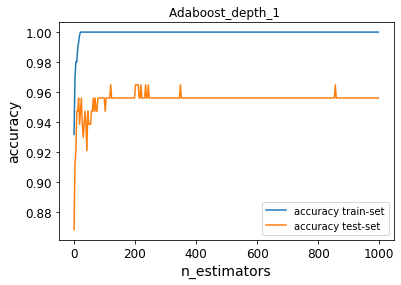

In [119]:
# plot
plt.plot(estimators, abc_scores_train, label = 'accuracy train-set')
plt.plot(estimators, abc_scores_test, label = 'accuracy test-set')
plt.title("Adaboost_depth_1 ")
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_1", dpi=300,  bbox_inches='tight')
plt.show()

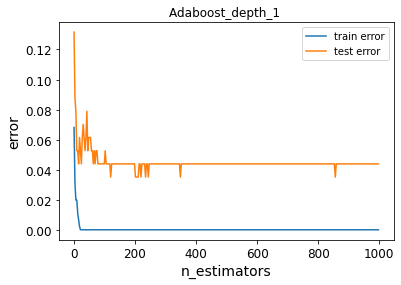

In [120]:
# plot
plt.plot(estimators, abc_train_err, label='train error')
plt.plot(estimators, abc_test_err, label='test error')
plt.title("Adaboost_depth_1 ")
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_1", dpi=300,  bbox_inches='tight')
plt.show()

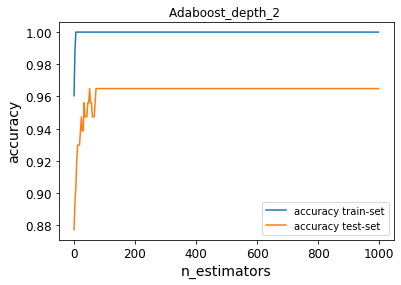

In [121]:
# plot
plt.plot(estimators, depth_2_score_train, label = 'accuracy train-set')
plt.plot(estimators, depth_2_score_test, label = 'accuracy test-set')
plt.title("Adaboost_depth_2 ")
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
plt.show()

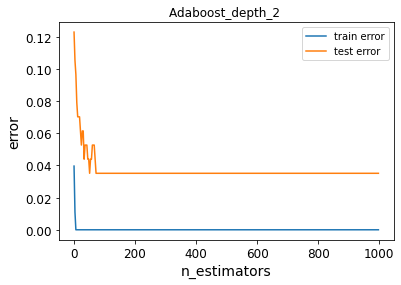

In [122]:
# plot
plt.plot(estimators, depth_2_train_err, label='train error')
plt.plot(estimators, depth_2_test_err, label='test error')
plt.title("Adaboost_depth_2 ")
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
plt.show()

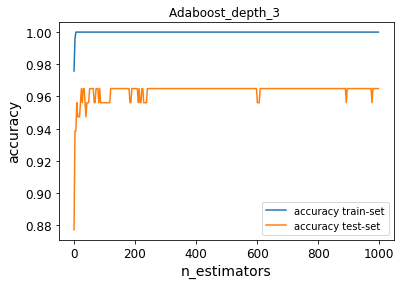

In [123]:
# plot
plt.plot(estimators, depth_3_score_train, label = 'accuracy train-set')
plt.plot(estimators, depth_3_score_test, label = 'accuracy test-set')
plt.title("Adaboost_depth_3 ")
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
plt.show()

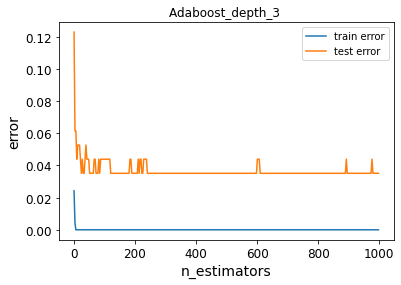

In [124]:
# plot
plt.plot(estimators, depth_3_train_err, label='train error')
plt.plot(estimators, depth_3_test_err, label='test error')
plt.title("Adaboost_depth_3 ")
plt.xlabel('n_estimators')
plt.ylabel('error')
#plt.ylim([0.85, 1])
plt.legend()
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
plt.show()

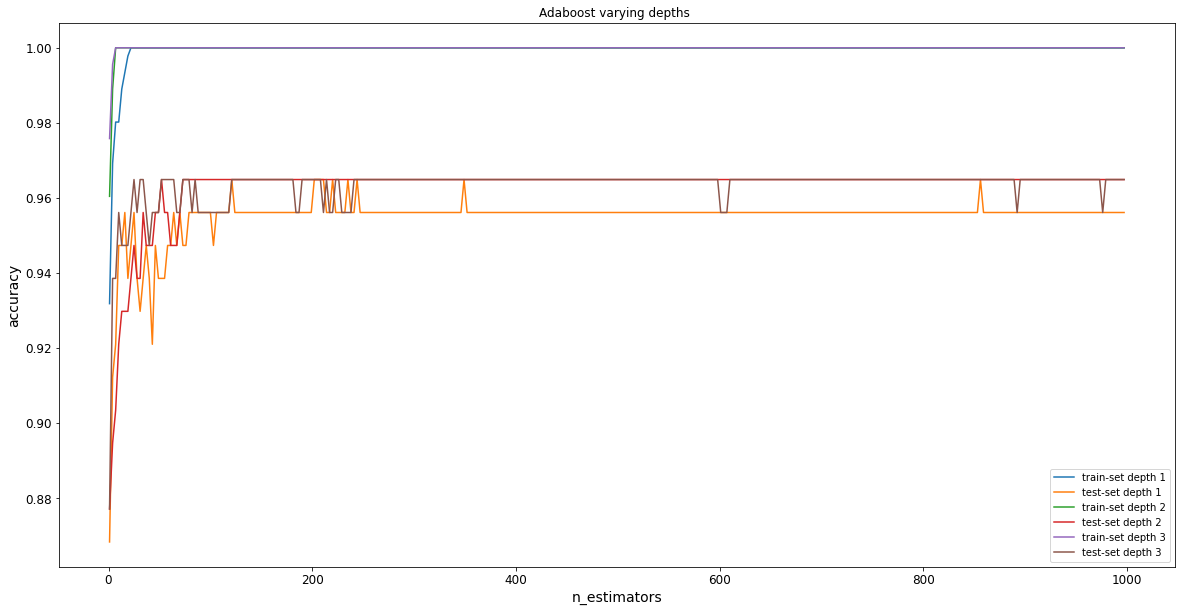

In [125]:
plt.figure(figsize=(20,10))
plt.plot(estimators, abc_scores_train, label = 'train-set depth 1')
plt.plot(estimators, abc_scores_test, label = 'test-set depth 1')
plt.plot(estimators, depth_2_score_train, label = 'train-set depth 2')
plt.plot(estimators, depth_2_score_test, label = 'test-set depth 2')
plt.plot(estimators, depth_3_score_train, label = 'train-set depth 3')
plt.plot(estimators, depth_3_score_test, label = 'test-set depth 3')
plt.title("Adaboost varying depths ")
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
plt.show()

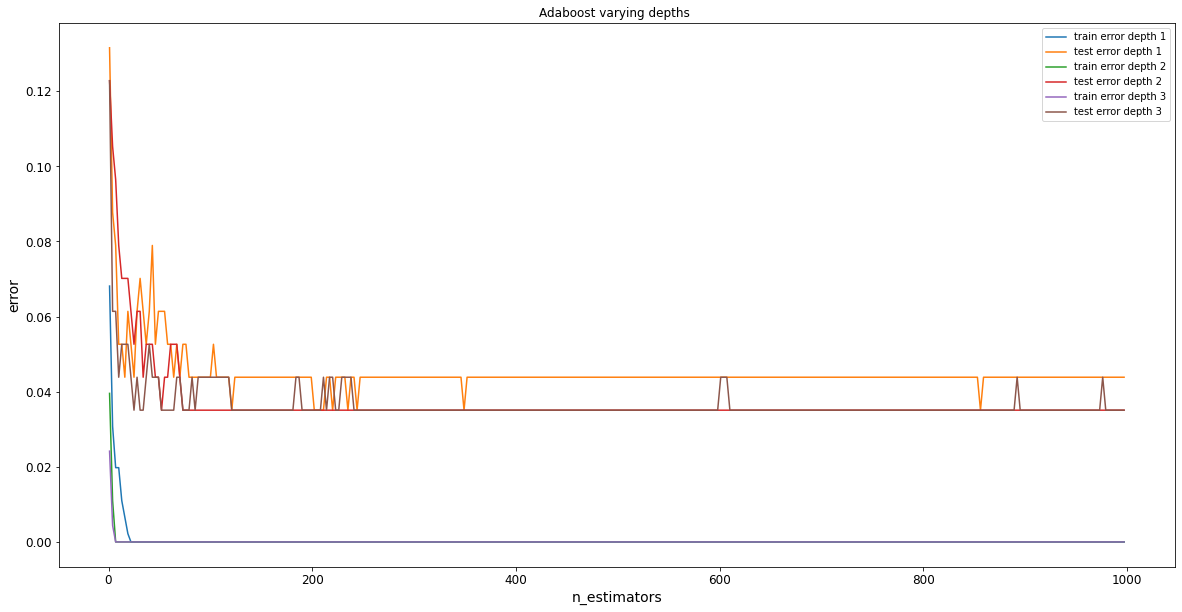

In [126]:
plt.figure(figsize=(20,10))
plt.plot(estimators, abc_train_err, label='train error depth 1')
plt.plot(estimators, abc_test_err, label='test error depth 1')
plt.plot(estimators, depth_2_train_err, label='train error depth 2')
plt.plot(estimators, depth_2_test_err, label='test error depth 2')
plt.plot(estimators, depth_3_train_err, label='train error depth 3')
plt.plot(estimators, depth_3_test_err, label='test error depth 3')
plt.title("Adaboost varying depths ")
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend()
#plt.ylim([0.85, 1])
#plt.savefig("Adaboost_depth_2", dpi=300,  bbox_inches='tight')
plt.show()

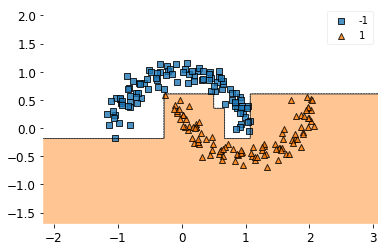

In [127]:
ada1 = Adaboost()

pred_test1_ada1 = ada1.fit(df_X_moons, df_y_moons.T.squeeze(), 200, 1)

fig = plot_decision_regions(df_X_moons.to_numpy(), (df_y_moons.T.squeeze()).to_numpy(), clf=pred_test1_ada1)



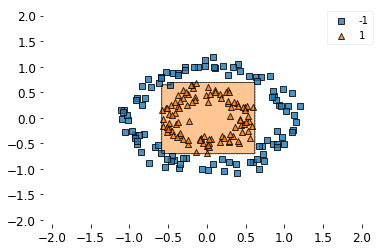

In [128]:
ada2 = Adaboost()

pred_test2_ada2 = ada1.fit(df_X_circles, df_y_circles.T.squeeze(), 200, 1)

fig = plot_decision_regions(df_X_circles.to_numpy(), (df_y_circles.T.squeeze()).to_numpy(), clf=pred_test1_ada1)

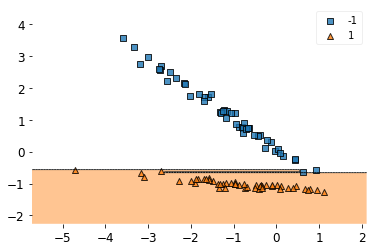

In [129]:
ada2 = Adaboost()

pred_test2_ada2 = ada1.fit(df_X_class, df_y_class.T.squeeze(), 200, 1)

fig = plot_decision_regions(df_X_class.to_numpy(), (df_y_class.T.squeeze()).to_numpy(), clf=pred_test1_ada1)